In [4]:
import keras
import os, shutil
# load jute and maize images

# Directories for training, validation, and test sets
train_dir = './training'
valid_dir ='./validation'
test_dir = './testing'

### The below is not necessary
# Directory with the training jute, maize, almond, banana, cherries and olives pictures
train_jute_dir = os.path.join(train_dir, 'Jute')
train_maize_dir = os.path.join(train_dir, 'Maize')
train_almond_dir = os.path.join(train_dir, 'Almond')
train_banana_dir = os.path.join(train_dir, 'Banana')
train_cherries_dir = os.path.join(train_dir, 'Cherries')
train_olives_dir = os.path.join(train_dir, 'Olives')

# Directory with the validation jute, maize, almond, banana, cherries and olives pictures
valid_jute_dir = os.path.join(valid_dir, 'Jute')
valid_maize_dir = os.path.join(valid_dir, 'Maize')
valid_almond_dir = os.path.join(valid_dir, 'Almond')
valid_banana_dir = os.path.join(valid_dir, 'Banana')
valid_cherries_dir = os.path.join(valid_dir, 'Cherries')
valid_olives_dir = os.path.join(valid_dir, 'Olives')

# Directory with the test jute, maize, almond, banana, cherries and olives pictures
test_jute_dir = os.path.join(test_dir, 'Jute')
test_maize_dir = os.path.join(test_dir, 'Maize')
test_almond_dir = os.path.join(test_dir, 'Almond')
test_banana_dir = os.path.join(test_dir, 'Banana')
test_cherries_dir = os.path.join(test_dir, 'Cherries')
test_olives_dir = os.path.join(test_dir, 'Olives')


print('Total training jute images:', len(os.listdir(train_jute_dir)))
print('Total training maize images:', len(os.listdir(train_maize_dir)))
print('Total training almond images:', len(os.listdir(train_almond_dir)))
print('Total training banana images:', len(os.listdir(train_banana_dir)))
print('Total training cherries images:', len(os.listdir(train_cherries_dir)))
print('Total training olives images:', len(os.listdir(train_olives_dir)))

print('\n')

print('Total validation jute images:', len(os.listdir(valid_jute_dir)))
print('Total validation maize images:', len(os.listdir(valid_maize_dir)))
print('Total validation almond images:', len(os.listdir(valid_almond_dir)))
print('Total validation banana images:', len(os.listdir(valid_banana_dir)))
print('Total validation cherries images:', len(os.listdir(valid_cherries_dir)))
print('Total validation olives images:', len(os.listdir(valid_olives_dir)))

print('\n')

print('Total test jute images:', len(os.listdir(test_jute_dir)))
print('Total test maize images:', len(os.listdir(test_maize_dir)))
print('Total test almond images:', len(os.listdir(test_almond_dir)))
print('Total test banana images:', len(os.listdir(test_banana_dir)))
print('Total test cherries images:', len(os.listdir(test_cherries_dir)))
print('Total test olives images:', len(os.listdir(test_olives_dir)))

Total training jute images: 14
Total training maize images: 19
Total training almond images: 12
Total training banana images: 20
Total training cherries images: 20
Total training olives images: 20


Total validation jute images: 4
Total validation maize images: 6
Total validation almond images: 4
Total validation banana images: 5
Total validation cherries images: 6
Total validation olives images: 5


Total test jute images: 5
Total test maize images: 5
Total test almond images: 5
Total test banana images: 6
Total test cherries images: 6
Total test olives images: 4


In [5]:
# Preprocess the images: read the image files; 
# decode the jpg to RBG grids of pixels (150x150); 
# convert to float point tensors; rescale the pixel values

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
print('\n')
print('Preprocess the training set')
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        directory = train_dir,      # The target directory
        target_size=(150, 150),     # Being resized to 150x150
        batch_size=12,
        class_mode='categorical',        # categorical classification
        seed = 63
        )

# Each batch has 20 samples, and each sample is an 150x150 RGB image 
# (shape 150,150,3) and binary labels.
print('\n')
print('In the first batch')
(data_batch, labels_batch) = train_generator[0]
print('Data batch shape:', data_batch.shape)
print('Labels batch shape:', labels_batch.shape)



Preprocess the training set
Found 105 images belonging to 6 classes.


In the first batch
Data batch shape: (12, 150, 150, 3)
Labels batch shape: (12, 6)


In [6]:
# preprocess the validation set
print('\n')
print('Preprocess the validation set')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
        directory = valid_dir,      
        target_size=(150, 150),     
        batch_size=20,
        class_mode= 'categorical',        
        seed = 63
        )

# preprocess the test set
print('\n')
print('Preprocess the test set')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        directory = test_dir,      
        target_size=(150, 150),     
        batch_size=1,
        class_mode='categorical',  
        shuffle = False,
        seed = 63
        )




Preprocess the validation set
Found 30 images belonging to 6 classes.


Preprocess the test set
Found 31 images belonging to 6 classes.


In [26]:
# build a CNN
from keras import layers
from keras import models
from keras import optimizers
import json
import os


def createModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                                input_shape=(150, 150, 3)))  
    model.add(layers.MaxPooling2D((2, 2))) # stride 2 (downsampled by a factor of 2)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
        
    model.add(layers.Flatten()) # Flatten the 3D outputs to 1D before adding a few Dense layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(6, activation='softmax')) # binary classificaiton

    model.compile(loss='categorical_crossentropy',
         optimizer=optimizers.RMSprop(1e-4),
                metrics=['acc'])

    return model;

# configure the model
# train the model
def trainModel(model):
    history = model.fit(
              train_generator,
              steps_per_epoch=10,      # 2000/20
              epochs=50,
              validation_data=valid_generator,
              validation_steps=50       # 1000/20
        )
    return history


#save 10 models
save_dir = "./saved_model/"
histories = []
history_dicts = []
for i in range(10):
    model = createModel()
    history = trainModel(model)
    histories.append(history)
    history_dicts.append(history.history) 
    model.save(save_dir + "multi_class_model_{}.keras".format(i+1))
# Save all history dicts to JSON
with open(f"{save_dir}/histories.json", "w") as f:
    json.dump(history_dicts, f)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - acc: 0.2079 - loss: 1.8054 - val_acc: 0.2333 - val_loss: 1.7670
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - acc: 0.2485 - loss: 1.7464 - val_acc: 0.2667 - val_loss: 1.7528
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - acc: 0.3026 - loss: 1.7229 - val_acc: 0.3667 - val_loss: 1.7162
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - acc: 0.4181 - loss: 1.6498 - val_acc: 0.4333 - val_loss: 1.6529
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - acc: 0.4634 - loss: 1.5915 - val_acc: 0.3667 - val_loss: 1.5951
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - acc: 0.4039 - loss: 1.5021 - val_acc: 0.3333 - val_loss: 1.5720
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - acc: 0.4789 - loss: 1.3746 - val_acc: 0.4000 - val_loss: 1.5380
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - acc: 0.4729 - loss: 1.2992 - val_acc: 0.3000 - val_loss: 1.6339
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - ac

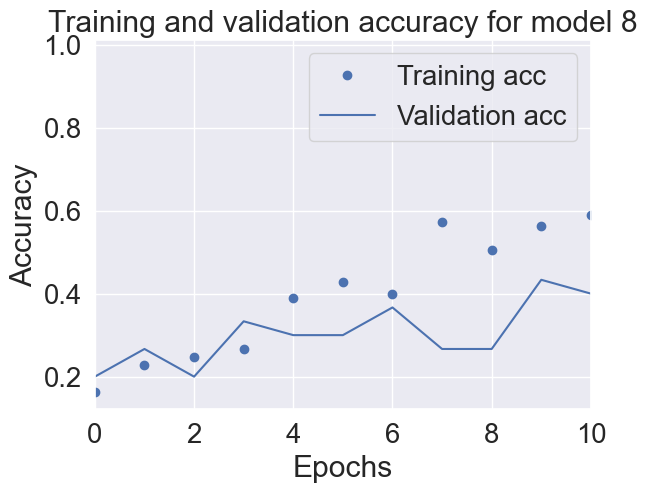

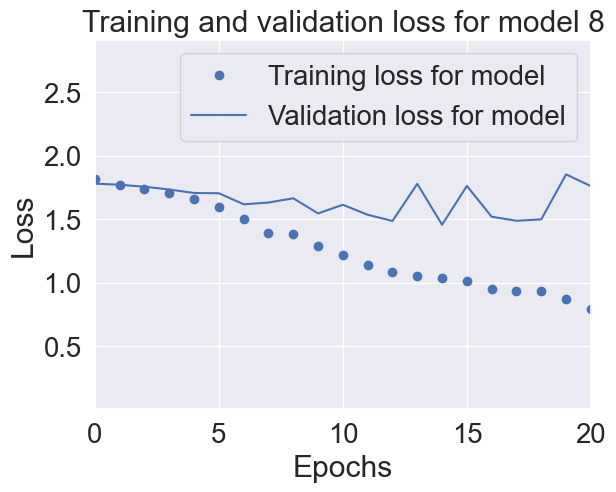

In [24]:
# plot the training and validation scores for a model
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os

with open('./saved_model/histories.json', 'r') as f:
    loaded_histories = json.load(f)
model = tf.keras.models.load_model("./saved_model/multi_class_model_8.keras")
history = loaded_histories[7]
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

# Accuracy plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for model 8')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 10)
plt.legend()

plt.figure()

# Loss plot
plt.plot(epochs, loss, 'bo', label='Training loss for model')
plt.plot(epochs, val_loss, 'b', label='Validation loss for model')
plt.title('Training and validation loss for model 8')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, 20)
plt.legend()

plt.show()


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


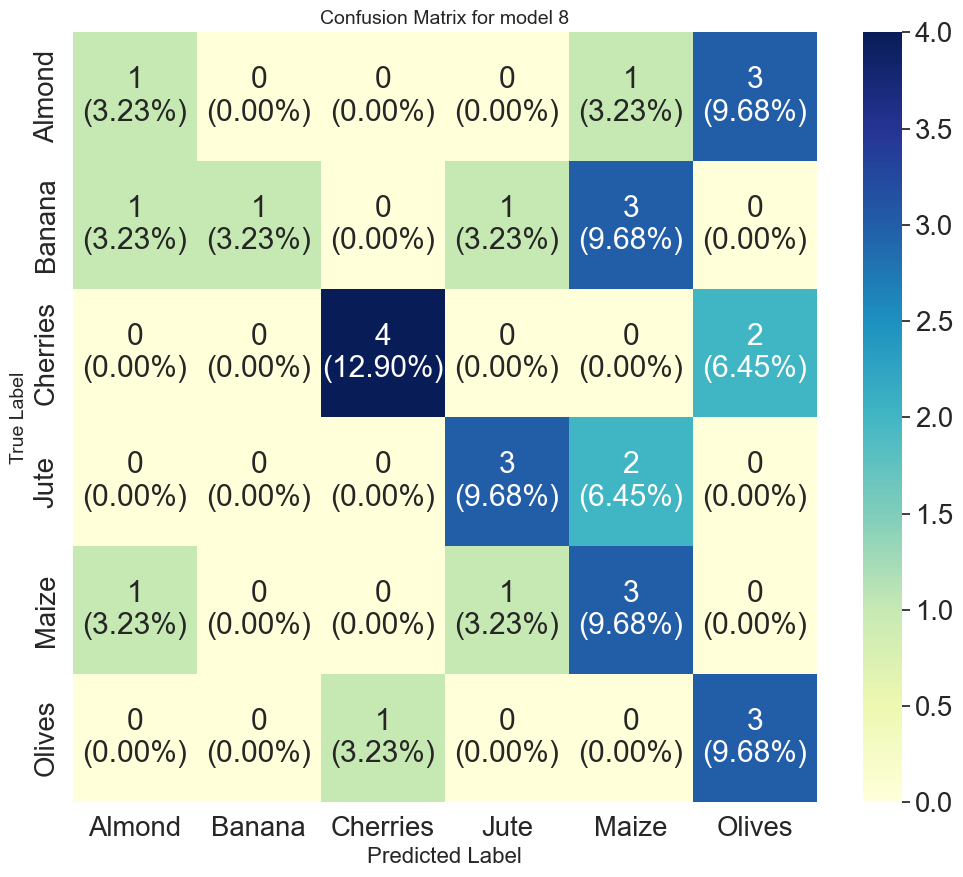

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

model = tf.keras.models.load_model("./saved_model/multi_class_model_8.keras")
# Get the true labels from the test generator
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix

step = test_generator.samples // test_generator.batch_size
pred = model.predict(test_generator, steps = step, verbose = 1)
predicted_class_indices = pred.argmax(axis=1)
cm = confusion_matrix(true_labels, predicted_class_indices)

# Plot the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)
plt.figure(figsize=(12, 10))
sns.set(font_scale = 1.8)
sns.heatmap(cm, annot=box_labels, fmt='', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label', fontsize = 16)
plt.ylabel('True Label', fontsize = 14)
plt.title('Confusion Matrix for model 8', fontsize = 14)
plt.show()

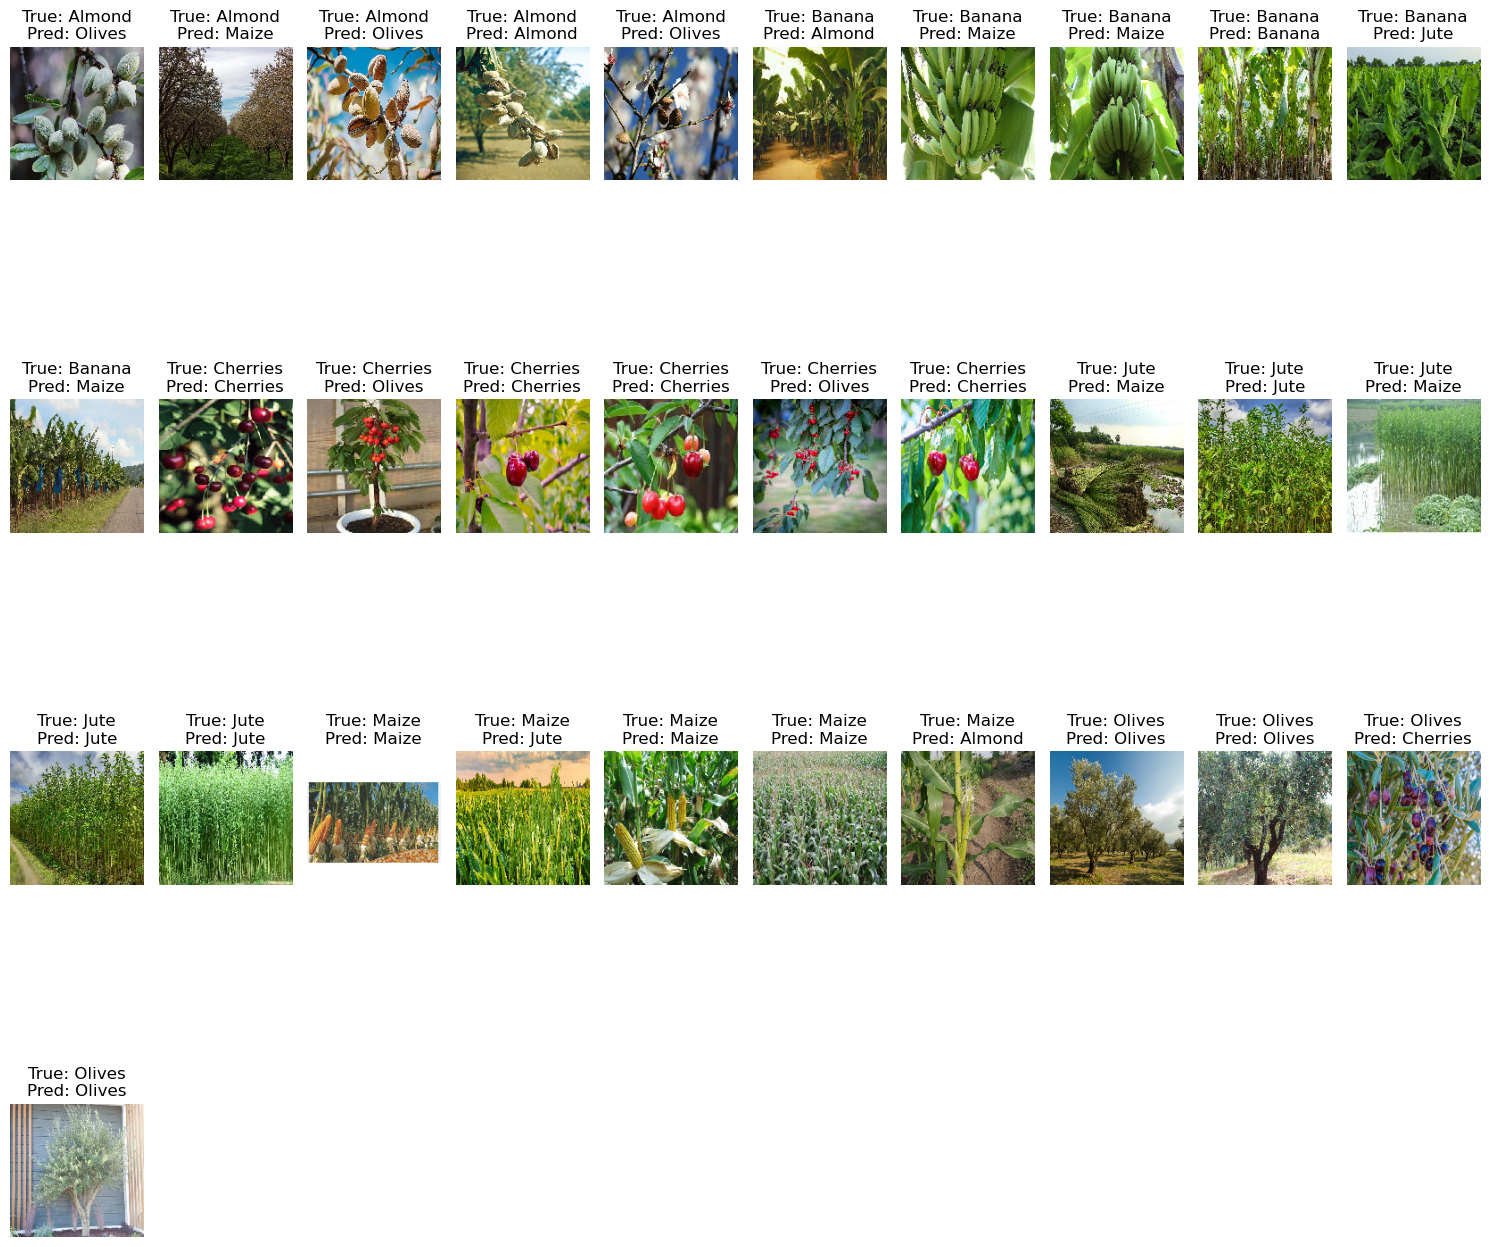

In [30]:
import matplotlib.pyplot as plt
# Display images with their true and predicted labels
num_images_to_show = 31

plt.figure(figsize=(15, 15))

for i in range(num_images_to_show):
    # Get image and label from the generator
    img, true_label = test_generator[i]
    img = img[0] # Get the single image from the batch
    true_label = np.argmax(true_label[0]) # Get the single label

    # Get the predicted label
    predicted_label = predicted_class_indices[i]

    # Map the integer labels back to class names
    true_class_name = class_labels[true_label]
    predicted_class_name = class_labels[predicted_label]

    plt.subplot(4, 10, i + 1)
    plt.imshow(img)
    plt.title(f'True: {true_class_name}\nPred: {predicted_class_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [52]:
# evaludate the model
# Evaluation
model = tf.keras.models.load_model("./saved_model/multi_class_model_8.keras")
eval_test = model.evaluate(test_generator, steps=35)
print("The test score (accuracy) is {}%".format(eval_test[1]*100))

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.3179 - loss: 1.7542
The test score (accuracy) is 48.38709533214569%


In [33]:
import tensorflow as tf
eval_test = 0.0
for i in range(10):
    model = tf.keras.models.load_model("./saved_model/multi_class_model_{}.keras".format(i+1))
    eval_test += model.evaluate(test_generator, steps=40)[1]
mean_eval = eval_test/10
print("The mean evaluation score is {}%".format(mean_eval * 100))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.3580 - loss: 2.5909
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.6549 - loss: 1.1614
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.4377 - loss: 1.9424
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.3396 - loss: 1.9584
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.3494 - loss: 1.7892
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.4090 - loss: 2.3644
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.4631 - loss: 1.7162
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.3386 - loss: 1.7284
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.4564 - loss: 1.1541
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.7013 - loss: 1.1750
The mean evaluation score is 52.5806438922882%


In [12]:
print('\nPreprocess the training set')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    seed=63
)

print('\nIn the first batch')
(data_batch, labels_batch) = train_generator[0]
print('Data batch shape:', data_batch.shape)
print('Labels batch shape:', labels_batch.shape)

print('\nPreprocess the validation set')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    seed=63
)

print('\nPreprocess the test set')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=63
)


Preprocess the training set
Found 105 images belonging to 6 classes.

In the first batch
Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20, 6)

Preprocess the validation set
Found 30 images belonging to 6 classes.

Preprocess the test set
Found 31 images belonging to 6 classes.


In [57]:
import json
model = createModel()
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=50
)
# Save the model
model.save('multi_class_model.keras')

# Save history.history dict to JSON
with open("history.json", "w") as f:
    json.dump(history.history, f)

C:\PyIDE\envs\myTF\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - acc: 0.1653 - loss: 1.8261 - val_acc: 0.1667 - val_loss: 1.7849
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.1659 - loss: 1.7831 - val_acc: 0.2333 - val_loss: 1.7719
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.1485 - loss: 1.7759 - val_acc: 0.2000 - val_loss: 1.7644
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.1710 - loss: 1.7712 - val_acc: 0.2333 - val_loss: 1.7628
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.2408 - loss: 1.7504 - val_acc: 0.3000 - val_loss: 1.7557
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.2384 - loss: 1.7729 - val_acc: 0.2000 - val_loss: 1.7470
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.2584 - loss: 1.7267 - val_acc: 0.2333 - val_loss: 1.7411
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.2396 - loss: 1.7194 - val_acc: 0.3333 - val_loss: 1.7336
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.2859

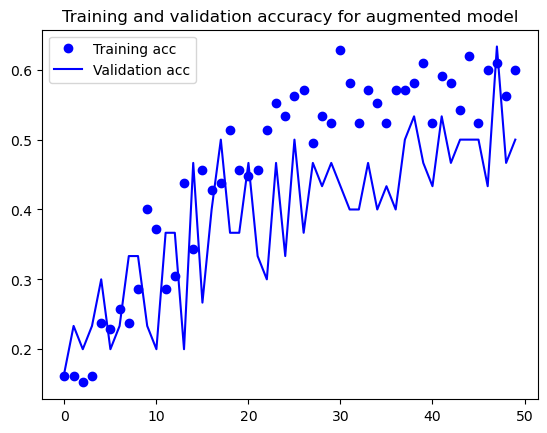

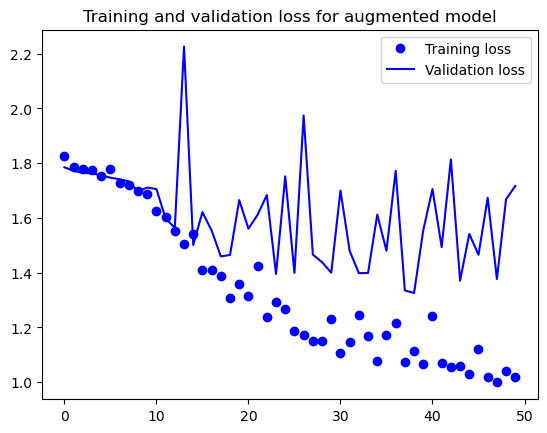

In [58]:
# plot the training and validation scores for a model
import matplotlib.pyplot as plt
import tensorflow as tf

with open("history.json", "r") as f:
    history = json.load(f)

model = tf.keras.models.load_model("multi_class_model.keras")
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for augmented model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for augmented model')
plt.legend()

plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


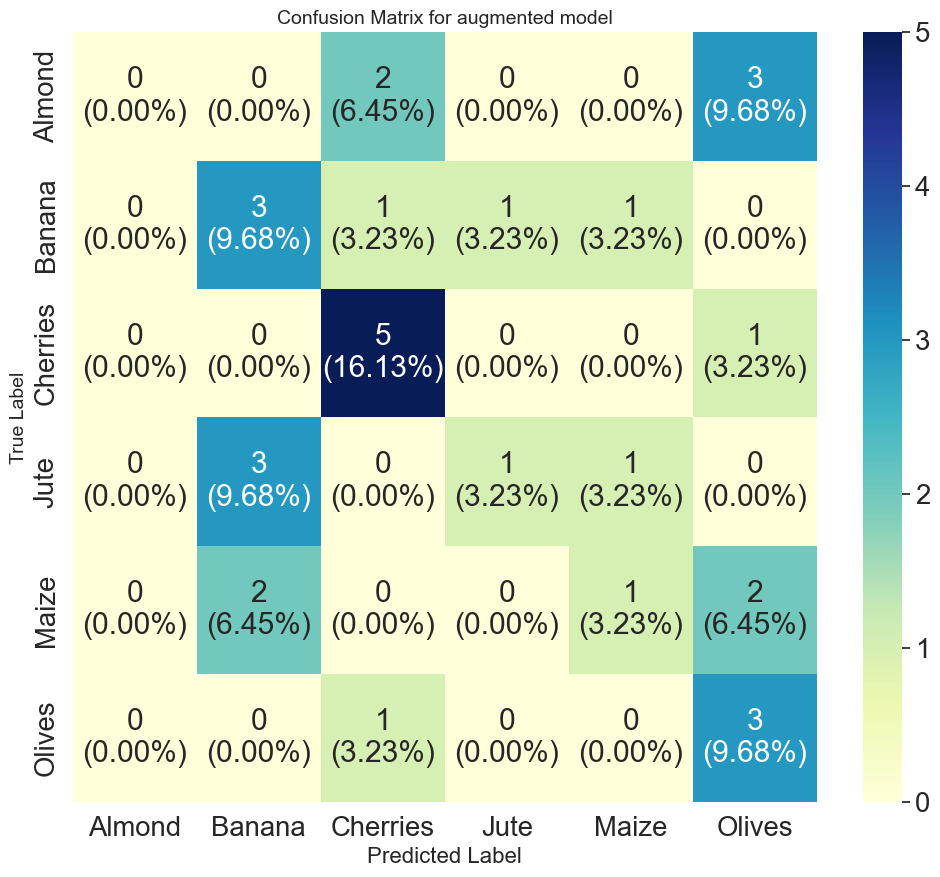

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model("multi_class_model.keras")
# Get the true labels from the test generator
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix

step = test_generator.samples // test_generator.batch_size
pred = model.predict(test_generator, steps = step, verbose = 1)
predicted_class_indices = pred.argmax(axis=1)
cm = confusion_matrix(true_labels, predicted_class_indices)

# Plot the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=box_labels, fmt='', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label', fontsize = 16)
plt.ylabel('True Label', fontsize = 14)
plt.title('Confusion Matrix for augmented model', fontsize = 14)
plt.show()

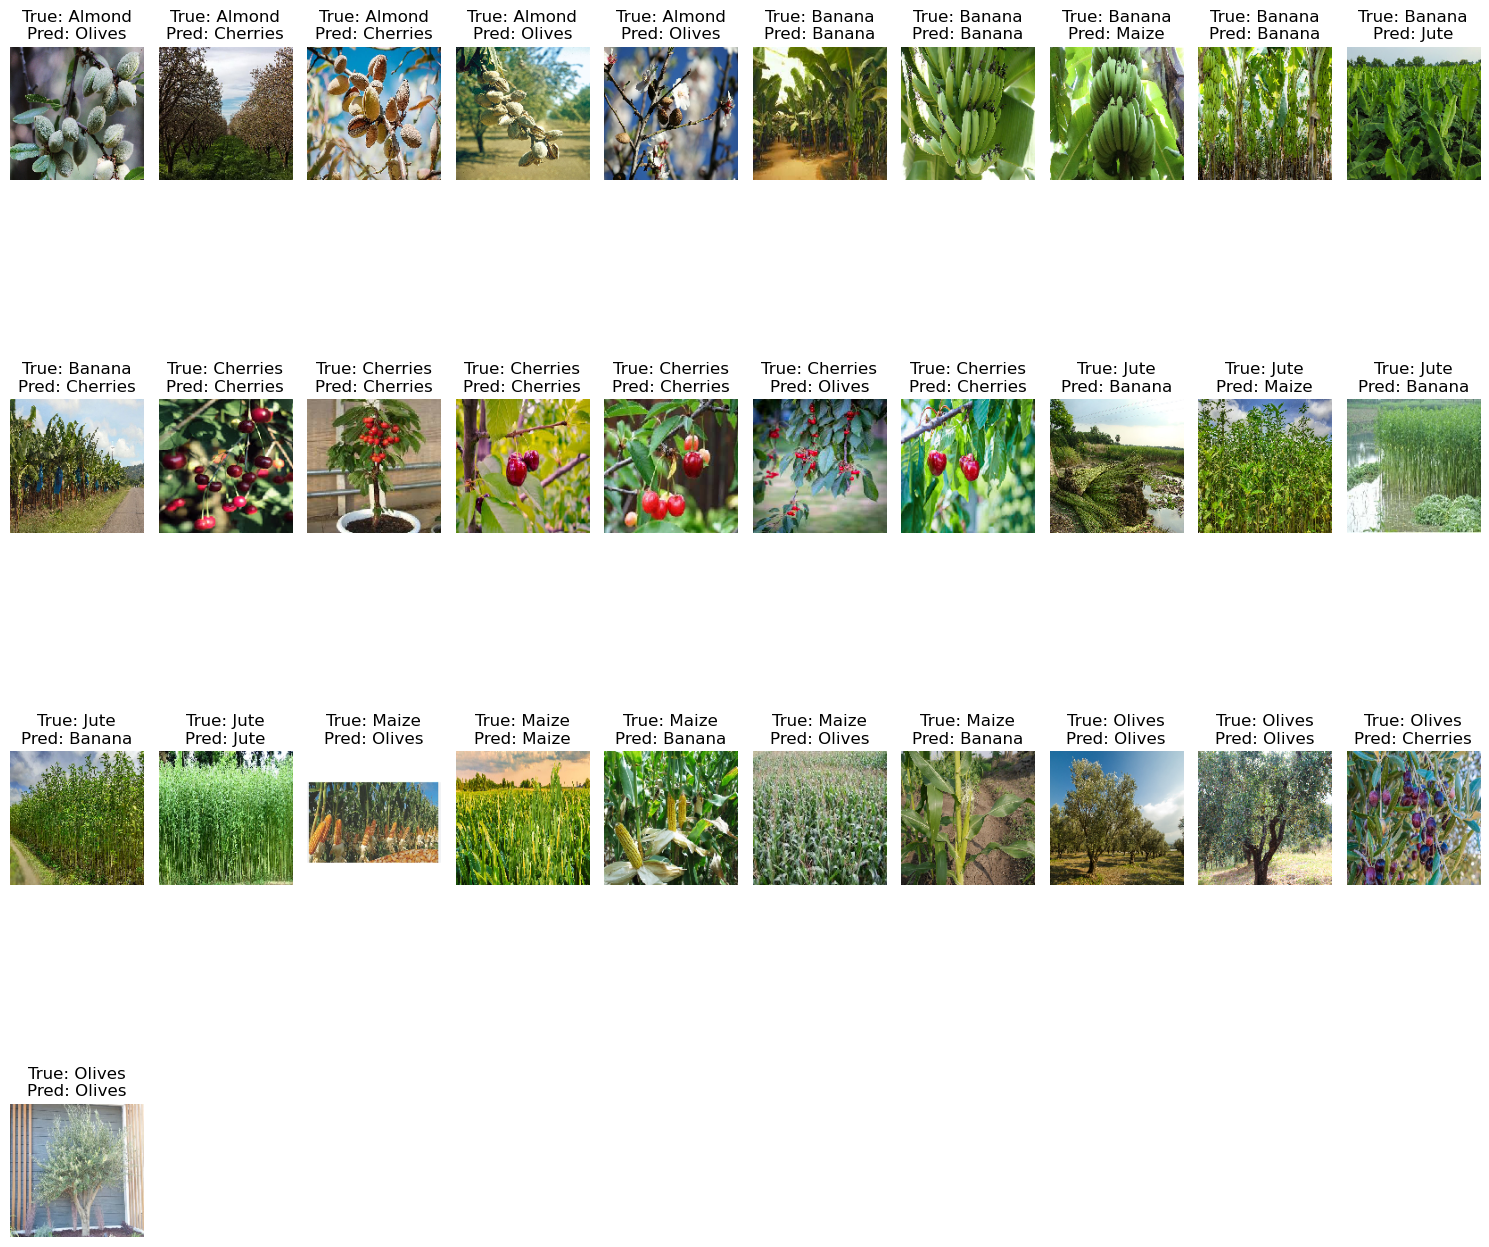

In [60]:
import matplotlib.pyplot as plt
# Display images with their true and predicted labels
num_images_to_show = 31

plt.figure(figsize=(15, 15))

for i in range(num_images_to_show):
    # Get image and label from the generator
    img, true_label = test_generator[i]
    img = img[0] # Get the single image from the batch
    true_label = np.argmax(true_label[0]) # Get the single label

    # Get the predicted label
    predicted_label = predicted_class_indices[i]

    # Map the integer labels back to class names
    true_class_name = class_labels[true_label]
    predicted_class_name = class_labels[predicted_label]

    plt.subplot(4, 10, i + 1)
    plt.imshow(img)
    plt.title(f'True: {true_class_name}\nPred: {predicted_class_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [61]:
# evaludate the model with Data Augmentation
# Evaluation
model = tf.keras.models.load_model("multi_class_model.keras")
eval_test = model.evaluate(test_generator, steps=35)
print("The test score (accuracy) is {}%".format(eval_test[1]*100))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.3272 - loss: 1.4343
The test score (accuracy) is 41.93548262119293%


C:\PyIDE\envs\myTF\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [39]:
from keras.applications import VGG16

conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
    )
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# build the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [41]:
# unfreeze the top block of convolutional base
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.summary()

# fine-tuning
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=valid_generator,
      validation_steps=50)
import json
model.save("multi_class_model_ft.keras")
# Save history.history dict to JSON
with open("history.json", "w") as f:
    json.dump(history.history, f)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,912,582 (72.15 MB)

 Trainable params: 11,277,318 (43.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 695ms/step - acc: 0.2357 - loss: 2.0361 - val_acc: 0.3000 - val_loss: 1.7683
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 652ms/step - acc: 0.1646 - loss: 1.9971 - val_acc: 0.3000 - val_loss: 1.7061
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 670ms/step - acc: 0.1726 - loss: 1.8966 - val_acc: 0.3333 - val_loss: 1.6705
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 660ms/step - acc: 0.3125 - loss: 1.6570 - val_acc: 0.3333 - val_loss: 1.6312
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - acc: 0.2315 - loss: 1.7662 - val_acc: 0.3000 - val_loss: 1.6029
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 592ms/step - acc: 0.3122 - loss: 1.7158 - val_acc: 0.3333 - val_loss: 1.5780
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 676ms/step - acc: 0.2198 - loss: 1.7539 - val_acc: 0.4333 - val_loss: 1.5433
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 609ms/step - acc: 0.3164 - loss: 1.6027 - val_acc: 0.4667 - val_loss: 1.5099
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 656ms/step - ac

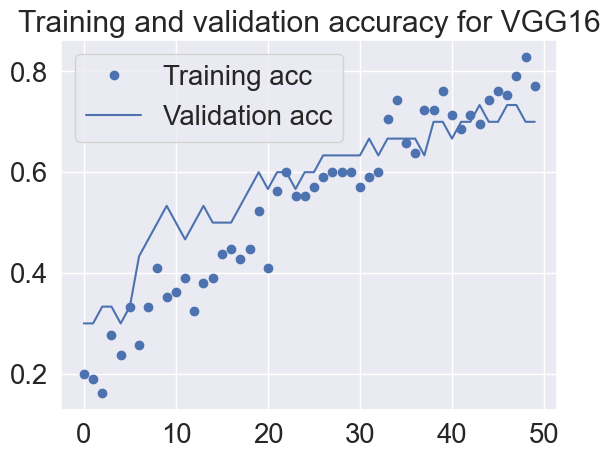

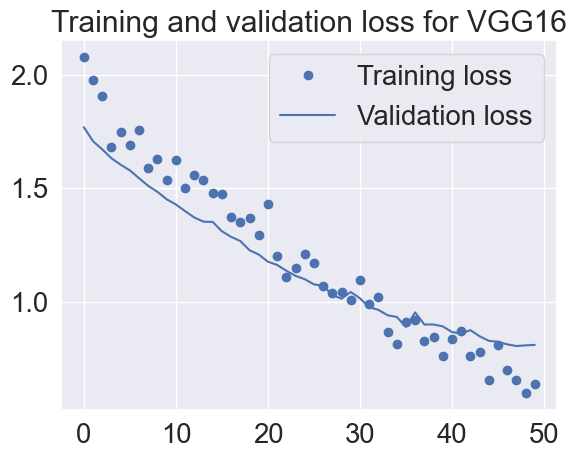

In [42]:
# plot the training and validation scores for a model
import matplotlib.pyplot as plt
import tensorflow as tf

with open("history.json", "r") as f:
    history = json.load(f)

model = tf.keras.models.load_model("multi_class_model_ft.keras")
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for VGG16')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for VGG16')
plt.legend()

plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step


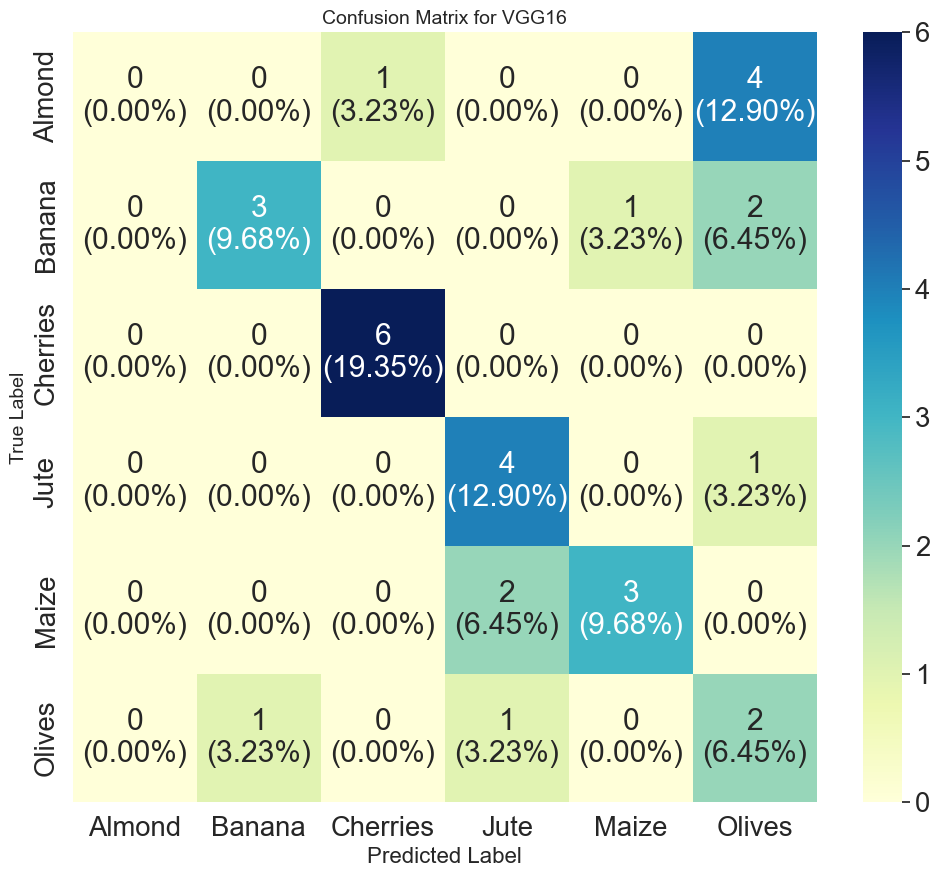

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model("multi_class_model_ft.keras")
# Get the true labels from the test generator
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix

step = test_generator.samples // test_generator.batch_size
pred = model.predict(test_generator, steps = step, verbose = 1)
predicted_class_indices = pred.argmax(axis=1)
cm = confusion_matrix(true_labels, predicted_class_indices)

# Plot the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=box_labels, fmt='', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label', fontsize = 16)
plt.ylabel('True Label', fontsize = 14)
plt.title('Confusion Matrix for VGG16', fontsize = 14)
plt.show()

In [44]:
# evaludate the model with fine tuning
# Evaluation
model = tf.keras.models.load_model("multi_class_model_ft.keras")
eval_test = model.evaluate(test_generator, steps=45)
print("The test score (accuracy) is {}%".format(eval_test[1]*100))

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - acc: 0.4484 - loss: 1.3347 
The test score (accuracy) is 58.06451439857483%


C:\PyIDE\envs\myTF\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [45]:
# initiate a pre-trained convolutional base Xception
from keras.applications import Xception

conv_base = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
    )
conv_base.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 74, 74,    │        864 │ input_layer_8[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 74, 74,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 74, 74,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 72, 72,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 72, 72,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 72, 72,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 72, 72,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 72, 72,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 72, 72,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 72, 72,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 72, 72,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 36, 36,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 36, 36,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 36,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 36, 36,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 36, 36,    │          0 │ add_12[0][0]    

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [46]:
# build the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [47]:
# unfreeze the top block of convolutional base
conv_base.trainable = True
import json
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.summary()

# fine-tuning
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=valid_generator,
      validation_steps=50)

model.save("multi_class_model_ft2.keras")

# Save history.history dict to JSON
with open("history.json", "w") as f:
    json.dump(history.history, f)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,079,470 (179.59 MB)

 Trainable params: 26,217,990 (100.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 600ms/step - acc: 0.2281 - loss: 1.9643 - val_acc: 0.3667 - val_loss: 1.5577
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 505ms/step - acc: 0.3745 - loss: 1.5606 - val_acc: 0.4667 - val_loss: 1.3756
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 508ms/step - acc: 0.5025 - loss: 1.3151 - val_acc: 0.5333 - val_loss: 1.2675
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 462ms/step - acc: 0.5029 - loss: 1.2841 - val_acc: 0.6000 - val_loss: 1.2040
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 454ms/step - acc: 0.5579 - loss: 1.1708 - val_acc: 0.6667 - val_loss: 1.1327
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 475ms/step - acc: 0.6011 - loss: 1.0006 - val_acc: 0.6000 - val_loss: 1.0968
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 464ms/step - acc: 0.5910 - loss: 1.1099 - val_acc: 0.6667 - val_loss: 1.0498
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 482ms/step - acc: 0.5929 - loss: 1.0240 - val_acc: 0.7000 - val_loss: 1.0079
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 505ms/step - ac

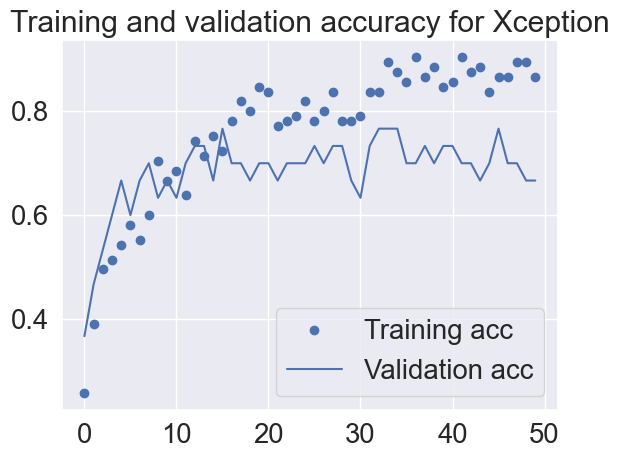

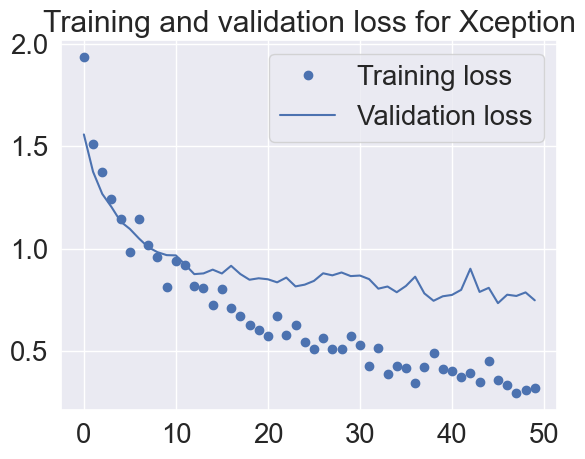

In [48]:
# plot the training and validation scores for a model
import matplotlib.pyplot as plt
import tensorflow as tf

with open("history.json", "r") as f:
    history = json.load(f)
    
model = tf.keras.models.load_model("multi_class_model_ft2.keras")
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Xception')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for Xception')
plt.legend()

plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


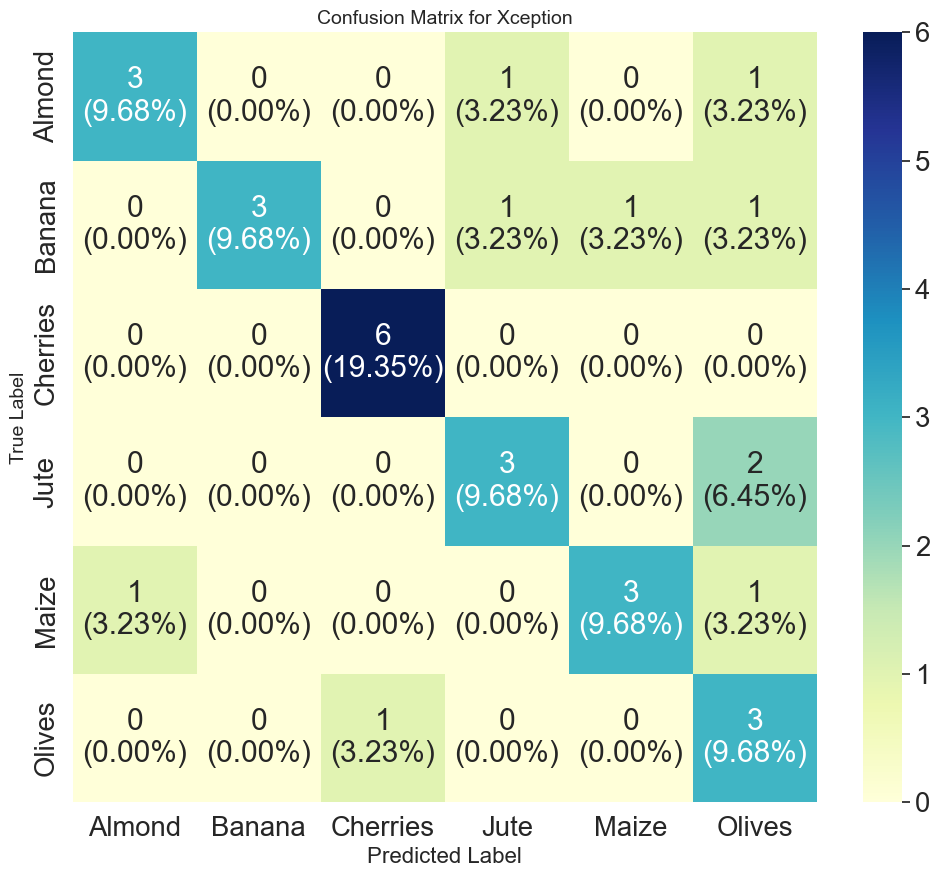

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model("multi_class_model_ft2.keras")
# Get the true labels from the test generator
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix

step = test_generator.samples // test_generator.batch_size
pred = model.predict(test_generator, steps = step, verbose = 1)
predicted_class_indices = pred.argmax(axis=1)
cm = confusion_matrix(true_labels, predicted_class_indices)

# Plot the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=box_labels, fmt='', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label', fontsize = 16)
plt.ylabel('True Label', fontsize = 14)
plt.title('Confusion Matrix for Xception', fontsize = 14)
plt.show()

In [50]:
# evaludate the model with Data Augmentation
# Evaluation
model = tf.keras.models.load_model("multi_class_model_ft2.keras")
eval_test = model.evaluate(test_generator, steps=45)
print("The test score (accuracy) is {}%".format(eval_test[1]*100))

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.6631 - loss: 1.0740
The test score (accuracy) is 67.7419364452362%


C:\PyIDE\envs\myTF\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
